# Spherical Regridding with Constructed Dimension Coordinates

In [1]:
# Plot images inline - not needed in Python
%matplotlib inline

In [2]:
# Import the cf and cfplot packages
import cf
import cfplot as cfp

In [3]:
# Read in ncas_data/precip_DJF_means.nc and inspect the field
f = cf.read_field('ncas_data/precip_DJF_means.nc')
print f

long_name:precipitation field summary
-------------------------------------
Data           : long_name:precipitation(long_name:time(1), long_name:latitude(360), long_name:longitude(720)) mm/day
Cell methods   : long_name:time: sum long_name:time: mean
Axes           : long_name:time(1) = [1996-07-16T12:00:00Z] gregorian
               : long_name:latitude(360) = [-89.75, ..., 89.75] degrees_north
               : long_name:longitude(720) = [-179.75, ..., 179.75] degrees_east



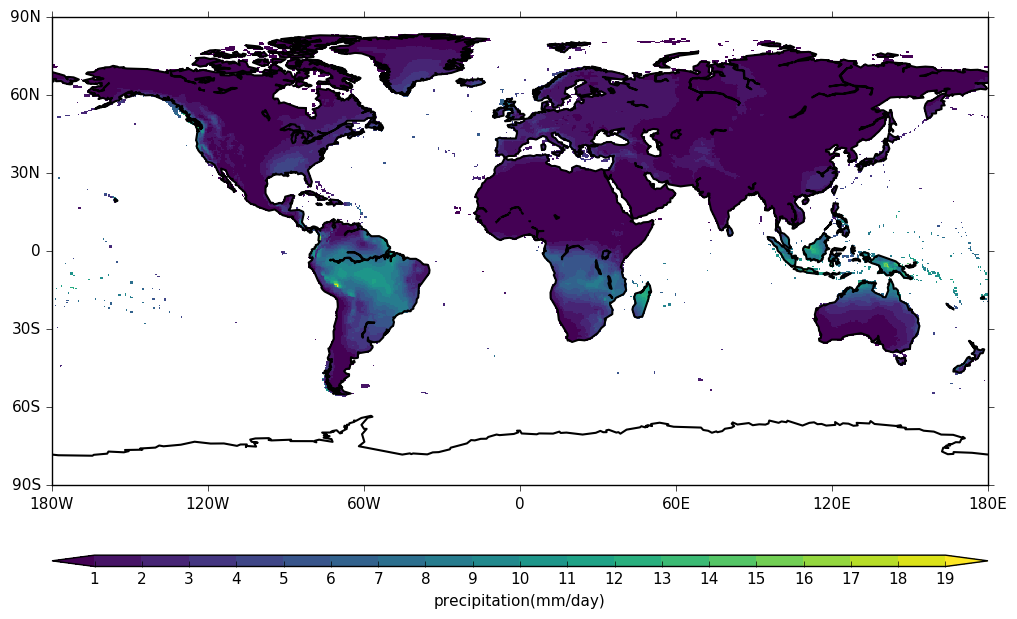

In [4]:
# Create a contour plot of the field
cfp.con(f, blockfill=True, lines=False)

In [5]:
# Create dimension coordinates for the destination grid
import numpy as np
lon = cf.DimensionCoordinate(data=cf.Data(np.arange(0, 360, 1.0), 'degrees_east'))
lat = cf.DimensionCoordinate(data=cf.Data(np.arange(-90, 90, 1.0), 'degrees_north'))

In [6]:
# Create Voronoi bounds for the new dimension coordinates
lon.get_bounds(create=True, insert=True)
lat.get_bounds(create=True, insert=True)

<CF Bounds: (180, 2) degrees_north>

In [7]:
# Regrid the field to the grid of the new coordinates bilinearly and inspect the resulting field
g = f.regrids({'longitude': lon, 'latitude': lat}, method='conservative')
print g

long_name:precipitation field summary
-------------------------------------
Data           : long_name:precipitation(long_name:time(1), latitude(180), longitude(360)) mm/day
Cell methods   : long_name:time: sum long_name:time: mean
Axes           : long_name:time(1) = [1996-07-16T12:00:00Z] gregorian
               : latitude(180) = [-90.0, ..., 89.0] degrees_north
               : longitude(360) = [0.0, ..., 359.0] degrees_east



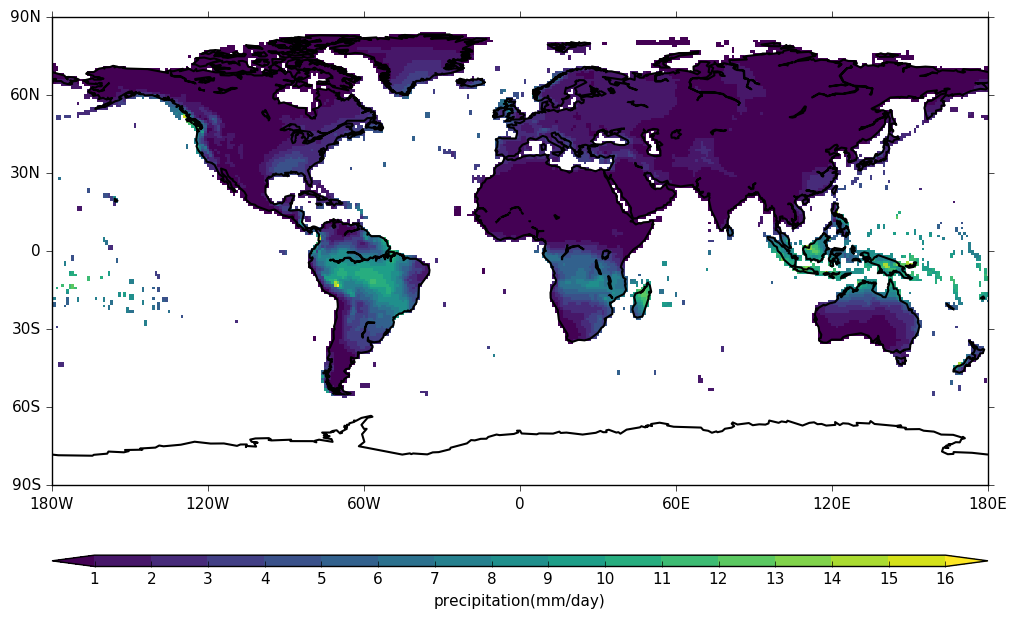

In [8]:
# Plot the regridded field
cfp.con(g, blockfill=True, lines=False)

# 2D Cartesian Regridding with Constructed Dimension Coordinates

In [9]:
# Read in ncas_data/alpine_precip_DJF_means.nc and inspect the field
f = cf.read_field('ncas_data/alpine_precip_DJF_means.nc')
print f

long_name:PRECIPITATION field summary
-------------------------------------
Data           : long_name:PRECIPITATION(long_name:time(1), projection_y_coordinate(138), projection_x_coordinate(243)) mm.d-1
Cell methods   : long_name:time: mean
Axes           : long_name:time(1) = [1996-07-15T12:00:00Z] standard
               : projection_y_coordinate(138) = [2210000.0, ..., 2895000.0] meters
               : projection_x_coordinate(243) = [3675000.0, ..., 4885000.0] meters
Aux coords     : longitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[2.12521505356, ..., 17.7066478729]] degrees_east
               : latitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[42.6916656494, ..., 48.9023704529]] degrees_north
Coord refs     : lambert_azimuthal_equal_area



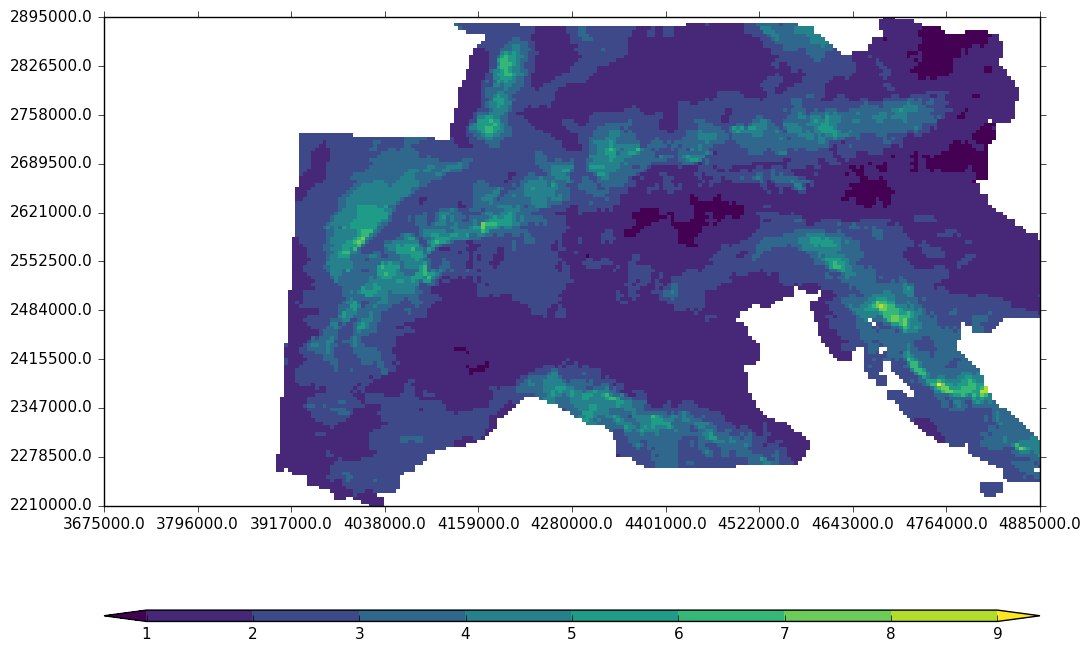

In [10]:
# Create a contour plot of the field
cfp.con(f=f.array.squeeze(), x=f.dim('X').array, y=f.dim('Y').array, blockfill=True, lines=False)

In [11]:
# Create destination dimension coordinates of lower resolution
import numpy as np
x = cf.DimensionCoordinate(data=cf.Data(np.arange(3675000.0, 4885000.0, 10000.0), 'meters'))
y = cf.DimensionCoordinate(data=cf.Data(np.arange(2210000.0, 2895000.0, 10000.0), 'meters'))
x.standard_name = 'projection_x_coordinate'
y.standard_name = 'projection_y_coordinate'

In [12]:
# Do a Cartesian regrid to the lower resolution grid and inspect the result
h = f.regridc({'X': x, 'Y': y}, ('X', 'Y'), method='bilinear')
print h

long_name:PRECIPITATION field summary
-------------------------------------
Data           : long_name:PRECIPITATION(long_name:time(1), projection_y_coordinate(69), projection_x_coordinate(121)) mm.d-1
Cell methods   : long_name:time: mean
Axes           : long_name:time(1) = [1996-07-15T12:00:00Z] standard
               : projection_y_coordinate(69) = [2210000.0, ..., 2890000.0] meters
               : projection_x_coordinate(121) = [3675000.0, ..., 4875000.0] meters



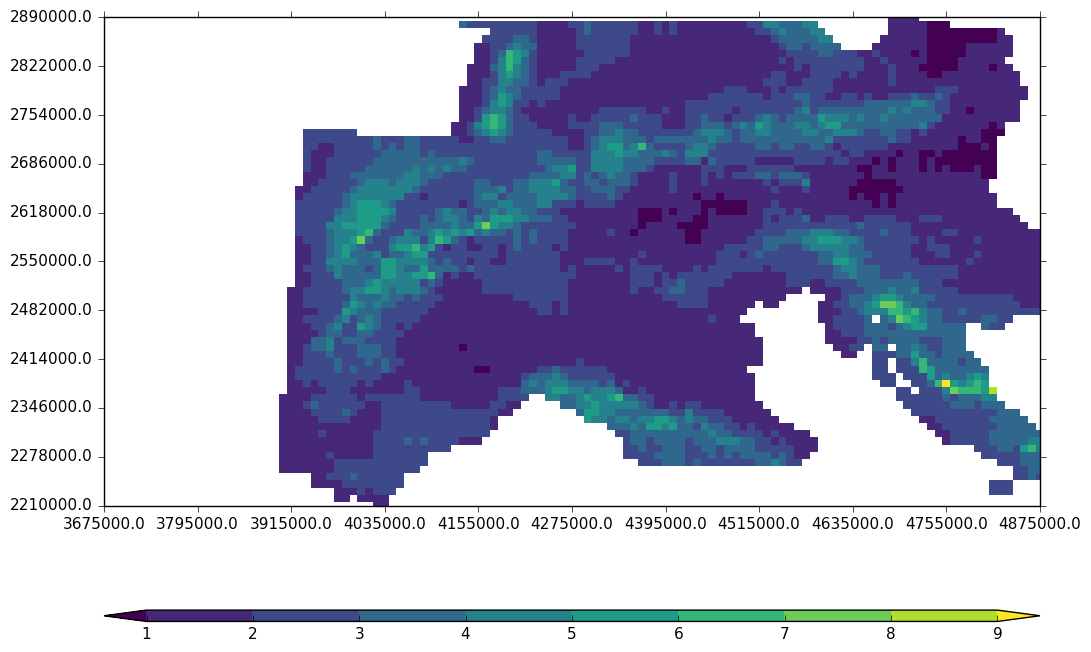

In [13]:
# Plot the regridded field
cfp.con(f=h.array.squeeze(), x=h.dim('X').array, y=h.dim('Y').array, blockfill=True, lines=False)